<a href="https://colab.research.google.com/github/rohandawar/-daysforcoding/blob/main/ImageWaterMarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we are writing the code for watermaking the images 

In [14]:
# Import Libs
import cv2
import numpy as np
import requests
from PIL import Image

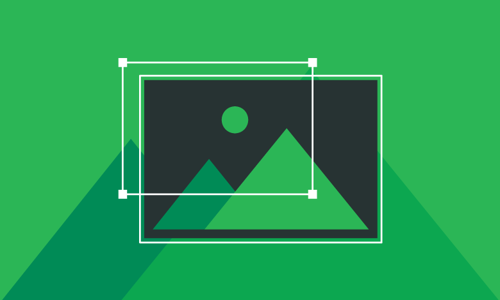

In [15]:
# reading the image from the web
image = Image.open(requests.get('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png', stream=True).raw)
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

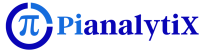

In [16]:
# read the logo image
logo = Image.open(requests.get('https://pianalytix.com/wp-content/uploads/2020/05/cropped-pianalytiX-full-logo-square-2-209x52.png', stream=True).raw)
logo

In [17]:
# convert the image into RGB & save into a numpy array
image_logow = np.array(image_logow.convert('RGB')) # this would be exeuted only once, other execution would give error
h_image,w_image,_ = image_logow.shape
logo = np.array(logo.convert('RGB')) # this would be exeuted only once, other execution would give error
h_logo,w_logo,_ = logo.shape

In [19]:
# Get the center of the original & Its location would be there
center_y =  int(h_image/2)
center_x =  int(w_image/2)

top_y = center_y - int(h_logo/2)
left_x = center_x -int(w_logo/2)

bottom_y = top_y + h_logo
right_x = left_x + w_logo

In [27]:
# Get ROI
roi = image_logow[top_y:bottom_y, left_x:right_x]

# Add the logo to the ROI
result = cv2.addWeighted(roi,1,logo,1,0)

# Drawing
cv2.line(image_logow,(0,center_y), (left_x, center_y), (0,0,255),1)
cv2.line(image_logow,(right_x,center_y), (w_image, center_y), (0,0,255),1)

# Replace
image_logow[top_y:bottom_y, left_x:right_x] = result

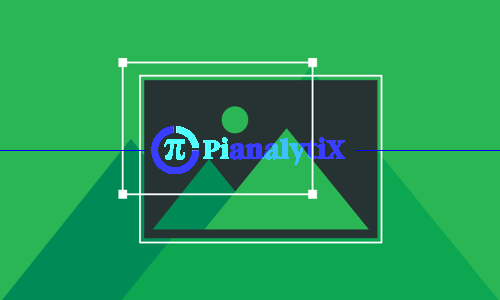

In [28]:
# Visulatize it
img = Image.fromarray(image_logow,'RGB')
img

In [29]:
# Text Watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='AddedTeXt', org=(w_image-95, h_image-10), fontFace=cv2.FONT_HERSHEY_COMPLEX,
            fontScale=0.5,color=(0,0,255),
            thickness=2,lineType=cv2.LINE_4)

array([[[ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86],
        ...,
        [ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86]],

       [[ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86],
        ...,
        [ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86]],

       [[ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86],
        ...,
        [ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86]],

       ...,

       [[ 43, 182,  86],
        [ 43, 182,  86],
        [ 44, 183,  86],
        ...,
        [ 44, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86]],

       [[ 43, 182,  86],
        [ 43, 182,  86],
        [ 42, 181,  86],
        ...,
        [ 29, 175,  83],
        [ 44, 182,  86],
        [ 43, 182,  86]],

       [[ 43, 182,  86],
        [ 43, 182,  86],
        [ 23, 162,  86],
        ...,
        [ 14, 168,  80],
        [ 36, 178,  85],
        [ 44, 182,  86]]

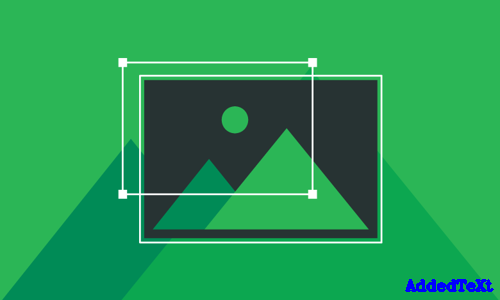

In [30]:
# Plotting the watermark IMage
timg = Image.fromarray(image_text,'RGB')
timg